In [11]:
import json
from sklearn.model_selection import train_test_split
import shutil
import glob
import numpy as np
import matplotlib.pyplot as plt

In [102]:
f = open('data/mango_dataset_with_annoation/instances_default.json')
annotation = json.load(f)

In [103]:
annotation.keys()

dict_keys(['licenses', 'info', 'categories', 'images', 'annotations'])

In [104]:
images = annotation['images']

In [105]:
X_train, X_test = train_test_split(images, train_size=0.9)


In [106]:
len(X_train)

162

In [107]:
X_train

[{'id': 169,
  'width': 5184,
  'height': 3456,
  'file_name': 'IMG_9415.jpg',
  'license': 0,
  'flickr_url': '',
  'coco_url': '',
  'date_captured': 0},
 {'id': 64,
  'width': 4032,
  'height': 3024,
  'file_name': 'IMG_1077.jpg',
  'license': 0,
  'flickr_url': '',
  'coco_url': '',
  'date_captured': 0},
 {'id': 24,
  'width': 4032,
  'height': 3024,
  'file_name': 'IMG_1007.jpg',
  'license': 0,
  'flickr_url': '',
  'coco_url': '',
  'date_captured': 0},
 {'id': 105,
  'width': 4032,
  'height': 3024,
  'file_name': 'IMG_1126.jpg',
  'license': 0,
  'flickr_url': '',
  'coco_url': '',
  'date_captured': 0},
 {'id': 162,
  'width': 5184,
  'height': 3456,
  'file_name': 'IMG_9390.jpg',
  'license': 0,
  'flickr_url': '',
  'coco_url': '',
  'date_captured': 0},
 {'id': 17,
  'width': 4032,
  'height': 3024,
  'file_name': 'IMG_0999.jpg',
  'license': 0,
  'flickr_url': '',
  'coco_url': '',
  'date_captured': 0},
 {'id': 91,
  'width': 4032,
  'height': 3024,
  'file_name': 'IMG_

In [108]:
img_id_list = [ x['id'] for x in  X_train]

In [109]:
len(img_id_list)

162

In [110]:
annotation_train = []
annotation_test = []
for i in annotation['annotations']:
    if i['image_id'] in img_id_list:
        annotation_train.append(i)
    else:
        annotation_test.append(i)

In [111]:
t = [i['image_id'] for i in annotation_train]

In [112]:
len(annotation['annotations'])

1207

In [113]:
len(annotation_train) + len(annotation_test)

1207

In [114]:
len(annotation_train)

1080

In [115]:
X_train2, X_val = train_test_split(X_train, train_size=0.9)


In [116]:
len(X_train2)

145

In [117]:
len(X_val)

17

In [118]:
img_id_list2 = [ x['id'] for x in  X_train2]

In [119]:
X_train2

[{'id': 150,
  'width': 5184,
  'height': 3456,
  'file_name': 'IMG_9362.jpg',
  'license': 0,
  'flickr_url': '',
  'coco_url': '',
  'date_captured': 0},
 {'id': 101,
  'width': 4032,
  'height': 3024,
  'file_name': 'IMG_1121.jpg',
  'license': 0,
  'flickr_url': '',
  'coco_url': '',
  'date_captured': 0},
 {'id': 19,
  'width': 4032,
  'height': 3024,
  'file_name': 'IMG_1002.jpg',
  'license': 0,
  'flickr_url': '',
  'coco_url': '',
  'date_captured': 0},
 {'id': 71,
  'width': 4032,
  'height': 3024,
  'file_name': 'IMG_1089.jpg',
  'license': 0,
  'flickr_url': '',
  'coco_url': '',
  'date_captured': 0},
 {'id': 159,
  'width': 5184,
  'height': 3456,
  'file_name': 'IMG_9384.jpg',
  'license': 0,
  'flickr_url': '',
  'coco_url': '',
  'date_captured': 0},
 {'id': 27,
  'width': 4032,
  'height': 3024,
  'file_name': 'IMG_1017.jpg',
  'license': 0,
  'flickr_url': '',
  'coco_url': '',
  'date_captured': 0},
 {'id': 61,
  'width': 4032,
  'height': 3024,
  'file_name': 'IMG_

In [120]:
annotation_train2 = []
annotation_val = []
for i in annotation_train:
    if i['image_id'] in img_id_list2:
        annotation_train2.append(i)
    else:
        annotation_val.append(i)
        

In [121]:
len(annotation_train2)

961

In [122]:
len(annotation_val)

119

In [123]:
len(annotation_train2)+len(annotation_val)+len(annotation_test)

1207

In [124]:
annotation.keys()

dict_keys(['licenses', 'info', 'categories', 'images', 'annotations'])

In [146]:
coco_train = annotation.copy()
coco_val = annotation.copy()
coco_test =annotation.copy()

In [148]:
coco_train['images'] = X_train2
coco_train['annotations'] = annotation_train2

coco_val['images'] = X_val
coco_val['annotations'] = annotation_val

coco_test['images'] = X_test
coco_test['annotations'] = annotation_test



In [153]:
print("coco_train -> img: ",len(coco_train['images']))
print("coco_train -> annotation", len(coco_train['annotations']))

print("coco_val -> img: ",len(coco_val['images']))
print("coco_val -> annotation", len(coco_val['annotations']))

print("coco_test -> img: ",len(coco_test['images']))
print("coco_test -> annotation", len(coco_test['annotations']))

coco_train -> img:  145
coco_train -> annotation 961
coco_val -> img:  17
coco_val -> annotation 119
coco_test -> img:  18
coco_test -> annotation 127


In [155]:
coco_train['annotations']

[{'id': 1,
  'image_id': 1,
  'category_id': 1,
  'segmentation': [[2052.55,
    1728.02,
    2069.31,
    1737.6,
    2063.32,
    1757.95,
    2068.11,
    1798.65,
    2078.89,
    1834.56,
    2062.13,
    1852.52,
    2045.37,
    1833.36,
    2028.61,
    1789.07,
    2025.02,
    1753.16,
    2031.0,
    1737.6]],
  'area': 4055.0,
  'bbox': [2025.02, 1728.02, 53.87, 124.5],
  'iscrowd': 0,
  'attributes': {'occluded': False}},
 {'id': 2,
  'image_id': 1,
  'category_id': 1,
  'segmentation': [[1677.86,
    1845.33,
    1701.8,
    1889.63,
    1708.99,
    1915.96,
    1695.82,
    1938.71,
    1674.27,
    1962.65,
    1657.51,
    1971.03,
    1650.33,
    1956.66,
    1673.07,
    1933.92,
    1641.95,
    1921.95,
    1646.74,
    1878.85,
    1663.5,
    1847.73]],
  'area': 5015.0,
  'bbox': [1641.95, 1845.33, 67.04, 125.7],
  'iscrowd': 0,
  'attributes': {'occluded': False}},
 {'id': 3,
  'image_id': 1,
  'category_id': 1,
  'segmentation': [[2111.33,
    1713.89,
    2

In [158]:
with open("data/to_train/train/annotation_train.json","w",encoding="utf-8") as json_file:
    json.dump(coco_train, json_file)

In [160]:
with open("data/to_train/validate/annotation_val.json","w",encoding="utf-8") as json_file:
    json.dump(coco_val, json_file)

In [161]:
with open("data/to_train/test/annotation_test.json","w",encoding="utf-8") as json_file:
    json.dump(coco_test, json_file)

In [163]:
train_img_file = [i['file_name'] for i in coco_train['images']]
val_img_file = [i['file_name'] for i in coco_val['images']]
test_img_file = [i['file_name'] for i in coco_test['images']]


In [167]:
root_path = "data/mango_dataset_with_annoation/dataset"

In [172]:
for i in train_img_file:
    src = root_path+"/"+i
    dst = "data/to_train/train/"+i
    shutil.copyfile(src, dst)



In [174]:
for i in val_img_file:
    src = root_path + "/" + i
    dst = "data/to_train/validate/" + i
    shutil.copyfile(src, dst)

In [175]:
for i in test_img_file:
    src = root_path + "/" + i
    dst = "data/to_train/test/" + i
    shutil.copyfile(src, dst)

In [182]:
img_train = glob.glob("data/to_train/validate/*.jpg")

In [183]:
len(img_train)

17

# EDA

In [7]:
f_train = open('/Users/apisak.ch/my_code/mango-object-detection/data/to_train/train/annotation_train.json')
annotation_train = json.load(f_train)

f_val = open('/Users/apisak.ch/my_code/mango-object-detection/data/to_train/validate/annotation_val.json')
annotation_val = json.load(f_val)

f_test = open('/Users/apisak.ch/my_code/mango-object-detection/data/to_train/test/annotation_test.json')
annotation_test = json.load(f_test)

In [22]:
data_img = {'img_train':len(annotation_train['images']),
           'img_val':len(annotation_val['images']),
           'img_test':len(annotation_test['images'])}

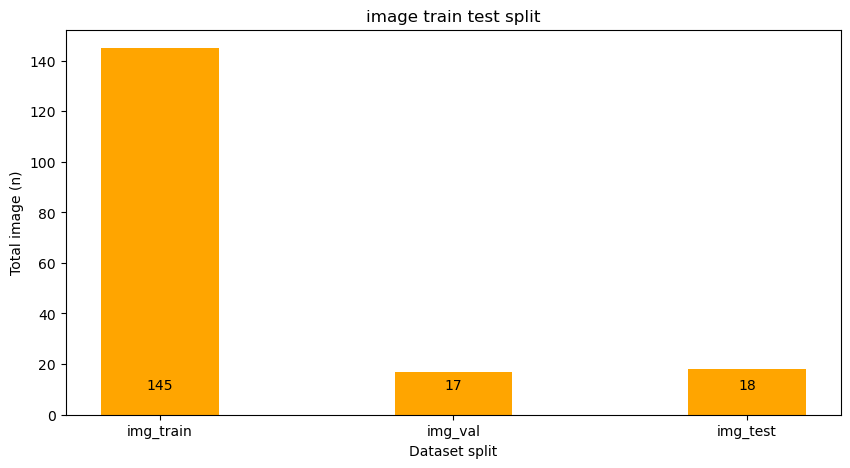

In [60]:
x_value = list(data_img.keys())
y_value = list(data_img.values())
fig = plt.figure(figsize = (10, 5))
plt.bar(x_value, y_value, color ='orange',
        width = 0.4)


plt.text(0,10,y_value[0],ha="center")
plt.text(1,10,y_value[1],ha="center")
plt.text(2,10,y_value[2],ha="center")



plt.xlabel("Dataset split")
plt.ylabel("Total image (n)")
plt.title("image train test split")
plt.show()


In [55]:
data_annotation = {'ann_train':len(annotation_train['annotations']),
           'ann_val':len(annotation_val['annotations']),
           'ann_test':len(annotation_test['annotations'])}

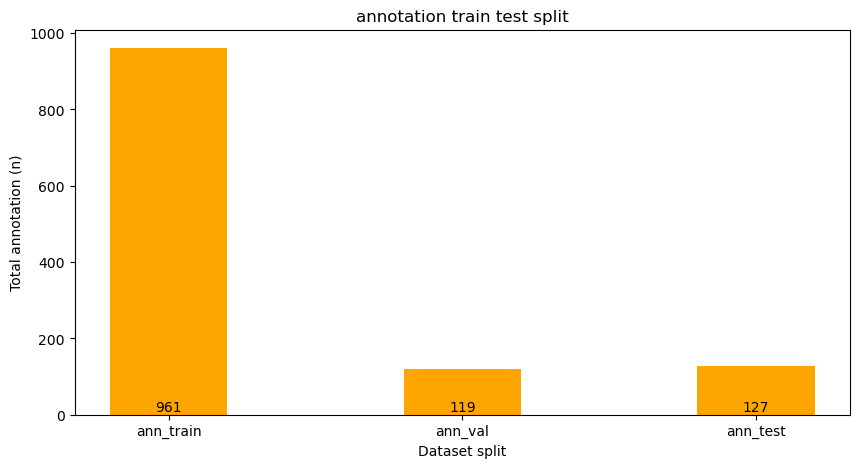

In [61]:
x_value = list(data_annotation.keys())
y_value = list(data_annotation.values())

fig = plt.figure(figsize = (10, 5))
plt.bar(x_value, y_value, color ='orange',
        width = 0.4)


plt.text(0,10,y_value[0],ha="center")
plt.text(1,10,y_value[1],ha="center")
plt.text(2,10,y_value[2],ha="center")



plt.xlabel("Dataset split")
plt.ylabel("Total annotation (n)")
plt.title("annotation train test split")
plt.show()
